### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

### Import the Dataset

In [3]:
gold_data = pd.read_csv('./gld_price_data.csv')

### Print First 5 Rows

In [4]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


### Print Last 5 Rows

In [5]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


### Number of Rows and Columns

In [6]:
gold_data.shape

(2290, 6)

### Basic Information About the Dataset

In [7]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


### Number of the Missing Values

In [8]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

### Statistical Measures of the Dataset 

In [9]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


### Correlation
<ul>
    <li>Positive</li>
    <li>Negative</li>
</ul>

In [11]:
correlation = gold_data.drop(['Date'],axis=1).corr()

### Heatmap

<Axes: >

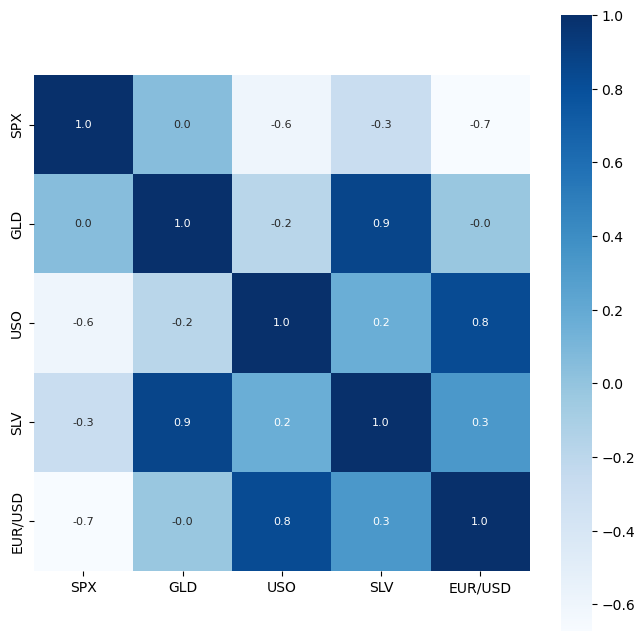

In [12]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

### Correlation Values of GLD

In [13]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


### Check Distribution of GLD Price

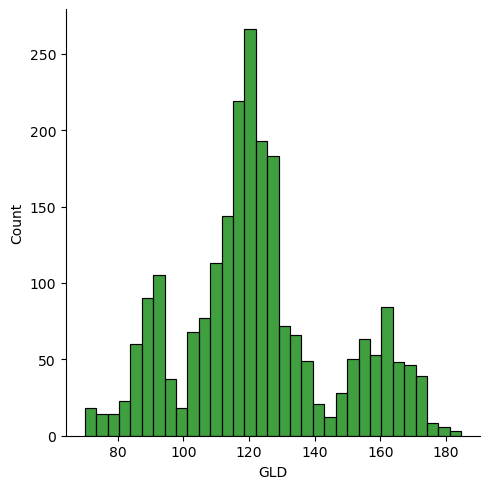

In [14]:
sns.displot(gold_data['GLD'], color='green')

### Splitting Features and Target

In [15]:
X = gold_data.drop(['Date','GLD'], axis=1)
Y = gold_data['GLD']

In [16]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [17]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


### Split the Dataset into Training and Testing

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

### Model Training
- Random Forest Regression

In [19]:
regressor = RandomForestRegressor(n_estimators=100)

### Train the Model

In [20]:
regressor.fit(X_train, Y_train)

RandomForestRegressor()

### Model Evaluation

Predication

In [21]:
test_data_predication = regressor.predict(X_test)

In [22]:
print(test_data_predication)

[168.63429931  81.98099969 115.94510032 127.43020059 120.96430145
 154.92629769 150.50639869 126.13870058 117.46079887 125.76720158
 116.24200123 171.56000121 141.19649893 167.74089885 115.19669994
 117.9051005  141.29600297 170.21000065 159.69040309 158.00469944
 155.15140053 125.58780012 175.96700058 157.57350374 125.14270032
  93.97149971  77.44070029 120.51150033 119.11709959 167.54079984
  88.08500088 125.28280023  91.25420093 117.54060019 121.16939926
 136.39440162 115.69170118 115.14140094 148.06679991 107.19140063
 104.6076024   87.26769822 126.45610021 117.76340008 151.78719851
 119.39240001 108.42639999 107.96589812  93.21940064 127.04749792
  75.24580019 113.59809911 121.29890015 111.2824992  118.86249885
 120.4024995  159.46499889 168.18200165 147.30319718  85.87019846
  94.38020056  86.88799933  90.52189995 119.02050062 126.49220079
 127.49309987 170.36890009 122.28929925 117.480799    98.7002002
 168.48080155 142.98699852 132.39900214 121.26750197 120.74959948
 119.933200

### R Squared Error

In [23]:
error_score = metrics.r2_score(Y_test, test_data_predication)
print("R Squared Error : ", error_score)

R Squared Error :  0.9885627071252715


### Visualize Comparison Between Actual and Predicated Values

In [24]:
Y_test = list(Y_test)

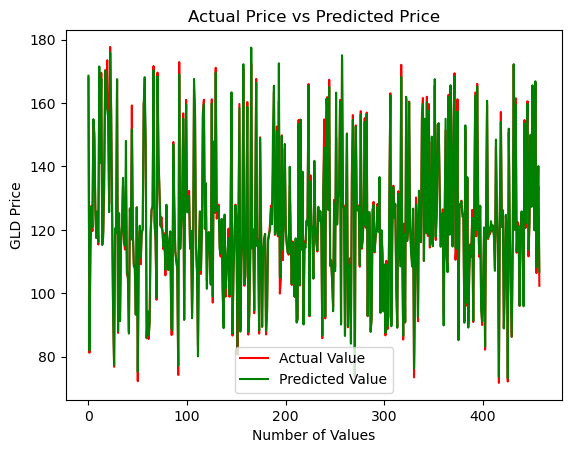

In [26]:
plt.plot(Y_test, color='red', label='Actual Value')
plt.plot(test_data_predication, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of Values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()